In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import json
import pandas as pd
from pandas.io.json import json_normalize
# author: jsara72
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
import random
import nltk
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk import word_tokenize
import pandas as pd
import re
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
import numpy as np

In [9]:
def griffin():
    
    order = ['id','time','text','language','retweeted','user_id']
    
    idt = re.compile("id:.*?created_at:")
    idt_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[3:-13]), idt.findall(f.read())))
    
    f.seek(0)
    time = re.compile("created_at:.*?text:")
    time_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[11:-7]), time.findall(f.read())))
    
    f.seek(0)

    text = re.compile("text:.*?lang:",re.DOTALL)
    text_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[5:-7]), text.findall(f.read())))
    
    
    f.seek(0)
    length = re.compile("lang:.*?source:")
    length_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[5:-9]), length.findall(f.read())))
    
    f.seek(0)
    retweeted = re.compile("retweeted:.*?retweet_count:")
    retweeted_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[10:-16]), retweeted.findall(f.read())))
    
    f.seek(0)
    retweet_counts = re.compile("retweet_counts:.*")
    retweet_counts_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[14:-1]), retweet_counts.findall(f.read())))
    
    f.seek(0)
    user_id_raw = re.findall(",[\w\d\-]+,\d+,['\+\w/\.\-\s\(\)&]+,['\w\s\^\$\*\+\?\{\}\[\]\\\|\(\)\.\-@:%\+~#\?&/=!]+,-?[\d\w]+,\w+], entities:", f.read())
    user_id = [re.findall(",.*?,",x)[0] for x in user_id_raw]
    # just for test
    '''f.seek(0)

    user_id_greedy = re.findall(".*?entities:", f.read())
    for u_g in user_id_greedy:
        matched = False
        for u_id in user_id:
            if u_id in u_g:
                matched = True
        if not matched:
            print(u_g)
    '''# end
    user_id_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[1:-1]), user_id))
   
    print(len(idt_temp),len(time_temp),len(text_temp),len(length_temp),len(retweeted_temp),len(user_id_temp))
    #print(user_id_temp)
    
    df = pd.DataFrame({order[0]: idt_temp,
                        order[1]: time_temp,
                        order[2]: text_temp,
                        order[3]: length_temp,
                        order[4]: retweeted_temp,
                        order[5]: user_id_temp})
    return df

In [10]:
f = open("part-00000") # 36725 tweets in this file

In [11]:
df0 = griffin()

36725 36725 36725 36725 36725 36725


In [12]:
df0.head()

,id,language,retweeted,text,time,user_id
0,822707826460073985,en,false,A guy who is so excited to draw a uterus on a ...,Sat Jan 21 07:30:05 +0000 2017,emmakahen
1,822707847440035840,en,false,@womensmarchlon Sorry I can't be there today. ...,Sat Jan 21 07:30:10 +0000 2017,f4rheen
2,822707893581578240,en,false,Worldwide Womens March kicks off in New Zea...,Sat Jan 21 07:30:21 +0000 2017,blackmoonlili
3,822707927140052992,ja,false,RT @channel__3: 2000 #WomensMarch \nhttps://t...,Sat Jan 21 07:30:29 +0000 2017,Zero_B_Eventail
4,822707943938420736,en,false,RT @politicalmiller: While Trump's #Inaugurati...,Sat Jan 21 07:30:33 +0000 2017,Amplitude350Lee


In [9]:
#open file with the rest of our tweets
#f = open("part-00000")

In [6]:
#add them to our dataset
#df_secondhalf = griffin()
#df_tot = pd.concat([df_0, df_secondhalf])

In [14]:
d = df0.duplicated(['id'])
df0['duplicate_id'] = d
#appends a new column that tells us if this tweet is a repeat
# we need to filter these tweets out!
df = df0.loc[lambda df0: df0['duplicate_id'] == 0]
#new dataframe df_filtered with repeat tweets filtered out (this keeps first version but not repeated version)

In [15]:
dd = df.duplicated(['user_id'])
df['duplicate_user'] = dd
#appends a new column that tells us if this tweet is by a new user
# with no other tweets in our dataset

/Users/Griffin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
df.head()

,id,language,retweeted,text,time,user_id,duplicate_id,duplicate_user
0,822707826460073985,en,false,A guy who is so excited to draw a uterus on a ...,Sat Jan 21 07:30:05 +0000 2017,emmakahen,False,False
1,822707847440035840,en,false,@womensmarchlon Sorry I can't be there today. ...,Sat Jan 21 07:30:10 +0000 2017,f4rheen,False,False
2,822707893581578240,en,false,Worldwide Womens March kicks off in New Zea...,Sat Jan 21 07:30:21 +0000 2017,blackmoonlili,False,False
3,822707927140052992,ja,false,RT @channel__3: 2000 #WomensMarch \nhttps://t...,Sat Jan 21 07:30:29 +0000 2017,Zero_B_Eventail,False,False
4,822707943938420736,en,false,RT @politicalmiller: While Trump's #Inaugurati...,Sat Jan 21 07:30:33 +0000 2017,Amplitude350Lee,False,False


In [17]:
df2 = df.loc[lambda df: df['duplicate_user'] == 0]
#new dataframe with only tweets by users who haven't tweeted yet

In [18]:
df3 = df.loc[lambda df: df['duplicate_user'] == 1]
#new dataframe with only tweets from users who tweeted before

In [19]:
df.loc[lambda df: df['user_id'] == 'alej_cx']

,id,language,retweeted,text,time,user_id,duplicate_id,duplicate_user
13,822708644378603520,en,false,RT @PattyArquette: Can't make it to DC for the...,Sat Jan 21 07:33:20 +0000 2017,alej_cx,False,False
35,822709822978015233,en,false,RT @yalitzamarin: WOMANS MARCH IN LA Jan 21! 9...,Sat Jan 21 07:38:01 +0000 2017,alej_cx,False,True


In [20]:
print('# tweets...') 
print(len(df))
print('# of first tweets')
print(len(df2))
print('# of tweets by same users')
print(len(df3))

# tweets...
36649
# of first tweets
33852
# of tweets by same users
2797


In [31]:
#appending a datetime form of the 'time' column to our dataframes (this is easier to work with in pandas)
aaa = df['time']
times_df = pd.to_datetime(aaa)
df['datetime_times'] = times_df
bbb = df2['time']
times_df2 = pd.to_datetime(bbb)
df2['datetime_times'] = times_df2
ccc = df3['time']
times_df3 = pd.to_datetime(ccc)
df3['datetime_times'] = times_df3

/Users/Griffin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Griffin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Griffin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [32]:
# Putting tweets into 10 minute bins so we can make a histogram of tweets vs. time
# change '10T' to 'xT' for x-minute bin size
times_df = df['datetime_times']
series = pd.Series(1, index=times_df)
times_df_10minbins = series.resample('10T').sum()

times_df2 = df2['datetime_times']
series2 = pd.Series(1, index=times_df2)
times_df2_10minbins = series2.resample('10T').sum()

times_df3 = df3['datetime_times']
series3 = pd.Series(1, index=times_df3)
times_df3_10minbins = series3.resample('10T').sum()

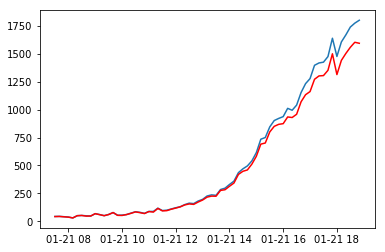

In [33]:
#plotting # all tweets vs time (p1, blue) and # tweets from new users
# vs time (p2, red)
p1 = plt.plot(times_df_10minbins)
p2 = plt.plot(times_df2_10minbins, 'r')

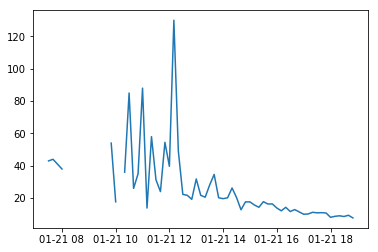

In [37]:
#ratio of tweets by new users vs. old users over time (this tells what % of the discussion is by new users)
newuser_ratio = times_df2_10minbins.divide(times_df3_10minbins) 
p3 = plt.plot(newuser_ratio)

In [24]:
def get_filtered_tokens2(text):
    tokens = word_tokenize(text)
    #stop_words = set(stopwords.words('english'))
    filtered_tokens = [w.lower() for w in tokens if not w.lower() and not w.lower() in [':',"#", '@', 'https', ';','&', ',']]
    #print(nltk.FreqDist(filtered_tokens).most_common(200))
   #return filtered_tokens

In [25]:
tokens = word_tokenize(df['text'][1])
print(tokens)

['@', 'womensmarchlon', 'Sorry', 'I', 'ca', "n't", 'be', 'there', 'today', '.', 'With', 'you', 'in', 'spirit', '.', 'https', ':', '//t.co/WagNcU6KiI']


In [26]:
#counts then number of I's, you's and we's. Gives info about self-awareness.
i_count = np.zeros(len(df['text']))
you_count = np.zeros(len(df['text']))
we_count = np.zeros(len(df['text']))

for i in range(len(df['text'].values)):
    tokens = [ s.lower() for s in word_tokenize(df['text'].values[i])]
    for j in range(len(tokens)):
        if tokens[j]=='i':
            i_count[i] +=1
        elif tokens[j]=='you':
            you_count[i] +=1
        elif tokens[j]=='we':
            we_count[i] +=1
            
print('Mean number of 1st person singular...') 
print(np.mean(i_count))
print('Mean number of 1st person plural...') 
print(np.mean(we_count))
print('Mean number of 2nd person...') 
print(np.mean(you_count))
print('Std 1st person singular...')
print(np.std(i_count))
print('Std 1st person plural...')
print(np.std(we_count))
print('Std 2nd person...')
print(np.std(you_count))

Mean number of 1st person singular...
0.152473464487
Mean number of 1st person plural...
0.120712707032
Mean number of 2nd person...
0.100548446069
Std 1st person singular...
0.455560935321
Std 1st person plural...
0.377039126893
Std 2nd person...
0.364323429005


In [27]:
test1 = df.loc[lambda df: df['retweeted'] == 'false']
print('# not retweeted =')
print(len(test1))
test2 = df.loc[lambda df: df['retweeted'] == 'true']
print('# retweeted = ') 
print(len(test2))

# not retweeted =
36649
# retweeted = 
0


In [269]:
nltk.FreqDist(df['']).most_common(20)

In [14]:
def get_filtered_tokens(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w.lower() for w in tokens if not w.lower() in stop_words and not w.lower() in [':',"#", '@', 'https', ';','&', ',']]
    print(nltk.FreqDist(filtered_tokens).most_common(200))
   #return filtered_tokens

In [271]:
appended_text = ''
for t in df['text']:
    appended_text += t

In [272]:
get_filtered_tokens(appended_text)

[('womensmarch', 21586), ('.', 19540), ('rt', 9745), ('!', 8958), ('women', 8407), ('march', 7875), ("'s", 7802), ('today', 3827), ('marching', 3233), ('``', 2726), ("''", 2654), ('trump', 2583), ('?', 2261), ('people', 1980), ("n't", 1975), ('washington', 1915), ('amp', 1689), ('-', 1672), ('rights', 1638), ("'re", 1536), ('de', 1490), ('dc', 1378), ("'m", 1285), ('...', 1273), ('love', 1241), ('womensmarchrt', 1199), ('womensmarchonwashington', 1178), ('world', 1167), ('la', 1155), ('inauguration', 1038), ('protest', 1035), ('proud', 1035), ('womensmarchlondon', 1022), ('live', 981), ('us', 971), ('like', 960), ('cnn', 934), ('america', 915), ('go', 894), ('hillaryclinton', 876), ('que', 840), ('crowd', 833), ('marches', 829), (')', 822), ('believe', 822), ('(', 819), ('woman', 797), ('en', 788), ('around', 766), ('right', 742), ('whyimarch', 741), ('london', 740), ('standing', 727), ('day', 714), ('solidarity', 677), ('everyone', 675), ('thanks', 675), ('important', 665), ('sign', 6